# **LAB 11 ___ SUPPORT VECTOR MACHINE**

## **LAB TASK 01**

### **1.	Load and preprocess the dataset**

**impoer libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

**Load dataset**

In [5]:
data = pd.read_csv("heart_disease_uci.csv")

**View datset**

In [6]:
data.head()
data.shape
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**Handling missing values**

In [7]:
data.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

### **2. Exploratory data analysis (EDA)**

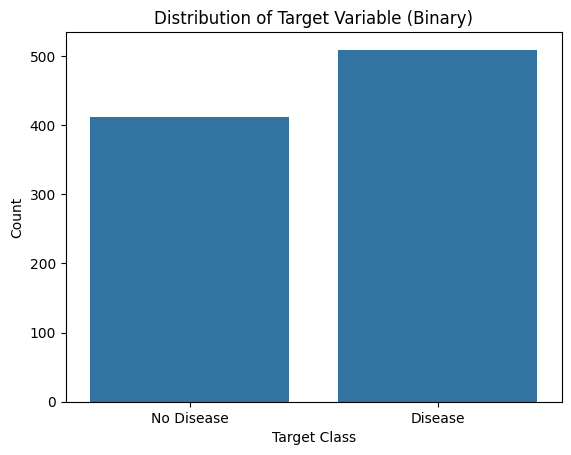

In [11]:
# Convert all non-zero values to 1 (binary classification)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
sns.countplot(x='num', data=data)
plt.title('Distribution of Target Variable (Binary)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])  # You can customize labels
plt.show()


### **3.Feature engineering:** 

**Feature Selection (example columns)**

In [38]:
features = ['age', 'sex', 'cp', 'chol', 'thal', 'num']  # Modify as needed
data = data[features]

**Encode Catageorial variables**

In [39]:
categorical_cols = ['sex', 'cp', 'thal']  
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

**Scale or normalize numerical features**

In [40]:
numeric_cols = ['age', 'chol']  # Replace with actual numerical columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(data.head())

        age  sex  cp      chol  thal  num
0  1.003716    1   3  0.305908     0    0
1  1.429964    1   0  0.784599     1    1
2  1.429964    1   0  0.269780     2    1
3 -1.766891    1   2  0.459450     1    0
4 -1.340643    0   1  0.043982     1    0


### **4.	Model selection and training:**

**Split the dataset into training and testing sets**

In [41]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('num', axis=1)  
y = data['num']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


**Choose the appropriate SVM kernel**

In [42]:
# Choose the kernel
kernel_choice = 'rbf'  # Change to 'linear' or 'poly' as needed


**Train the SVM model using scikit-learn**

In [43]:
from sklearn.svm import SVC

# Create the SVM model
model = SVC(kernel=kernel_choice)

# Train the model
model.fit(X_train, y_train)


SVC()

### **5.	Model evaluation:**

**: Evaluate the model performance**

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Show accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7752808988764045
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        75
           1       0.79      0.83      0.81       103

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.77       178
weighted avg       0.77      0.78      0.77       178



**Confusion matrix**

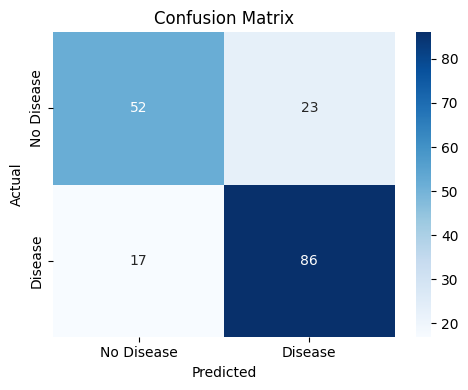

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### **6.	Hyperparameter tuning:**

**Define the parameter grid for tuning**

In [47]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for RBF, poly
    'degree': [3, 4, 5]  # Degree of the polynomial kernel (only for poly)
}

# Create the SVM model
svm = SVC()

**Set up GridSearchCV**

In [50]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Test the tuned model on the test data
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Score: 0.7935585541219344


**Evaluate the performance of the tuned model**

In [49]:
from sklearn.metrics import accuracy_score, classification_report
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.7584269662921348
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71        75
           1       0.78      0.81      0.79       103

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



### **7.   Conclusion**

The SVM model was tested with different types of kernels. The linear kernel works best when the data is easy to separate, like a straight line. The RBF kernel is better for complicated data that is not easily separated. We also adjusted settings like C and gamma to make the model better. The RBF kernel with the right settings worked best for predicting heart disease. Features like age and cholesterol are important for predicting heart disease.